Se usará al organismo Desulfovibrio como referencia para las secuencias

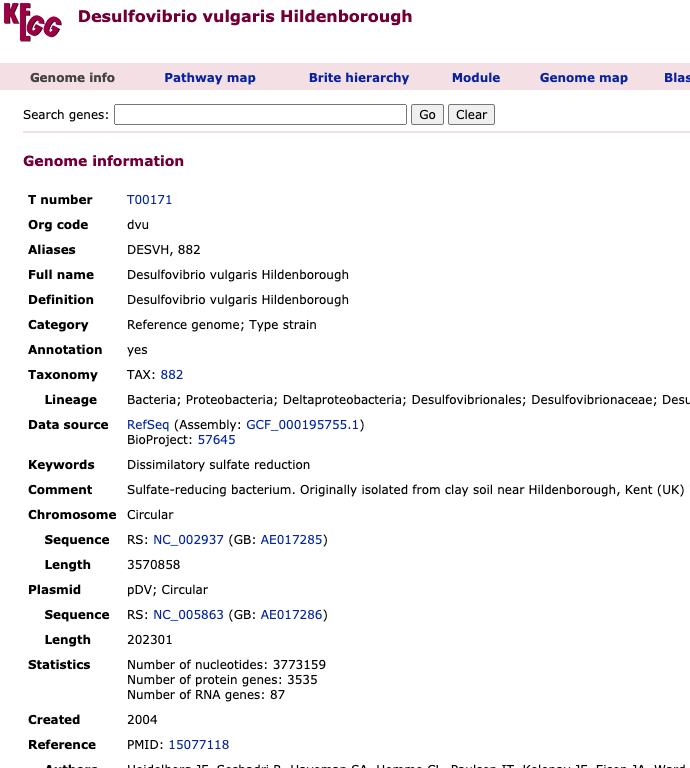

In [51]:
## Importar librerías
from Bio.KEGG import REST
from Bio.KEGG import Enzyme

# Ejemplo con un solo gen

In [52]:
## Obtener registro de Kegg segun el gen indicado
request = REST.kegg_get('ec:2.7.7.4')
record = Enzyme.read(request)

In [53]:
## Buscar el ID para la secuencia del organismo DVU (Desulfovibrio)
id_DVU = [item for item in record.genes if 'DVU' in item]
print(id_DVU)

[('DVU', ['DVU1295'])]


In [54]:
name = (id_DVU[0][0]).lower()
print(name)

dvu


In [55]:
identifier = id_DVU[0][1][0]
identifier

'DVU1295'

In [56]:
## Obtener la secuencia de aminoacidos
print(REST.kegg_get(f'{name}:{identifier}', 'aaseq').read())

>dvu:DVU1295 K00958 sulfate adenylyltransferase [EC:2.7.7.4] | (RefSeq) sat; sulfate adenylyltransferase (A)
MSKLVPAHGGKGLVCCLLEGADREAELKKAAGLKQIEISSRAKGDLIMMGIGGFSPLNGF
MKKADWKSVCEKMTLADGTFWPVPVTLDVSKDDAAAIKPGQEIALVRKGETFATMLVEEI
YEMTEADKKWECELVFKGEGPDSQKFWEVALDDHPGVKMVMEQKEFNIAGTVKVLSEGEF
PTKFAGVYKRPAELRKEMEERGWANVAALQLRNPMHRSHEFLAKIAIEVCDGVVIHSLVG
SLKPGDIPAEVRVRCIDTLVEKYFVKENVIQAGYPLDMRYAGPREGLLHATFRQNYGINR
MIIGRDHAGVGDFYGMFEAQTIFNKIPYINEACPTPGKALLCEPLKIDWTFYCYKCDGMA
SLRTCPHGKEDRVILSGTKLRKALSEGAEVVDHFGRDEVLVILREYYSGLTEKVEVKMQQ
AASGSVM



# Script utilizado

In [57]:
## Definir función para obtener las secuencias segun el organismo y gen indicado

def GetAASeqOrganism(gene, idOrganism, outFile):
    request = REST.kegg_get(gene)
    record = Enzyme.read(request)
    idOrganism = [item for item in record.genes if idOrganism in item]
    print(idOrganism)
    
    with open(outFile, 'a') as file:
        
        name = (idOrganism[0][0]).lower()
        for element in idOrganism[0][1]:
            identifier = element
            file.write(REST.kegg_get(f'{name}:{identifier}', 'aaseq').read())
    

In [58]:
## Lista de genes por buscar
genesList = ['ec:2.7.7.4', 'ec:1.8.99.2', 'ec:1.8.99.5']

for gene in genesList:
    GetAASeqOrganism(gene, 'DVU', 'outFileDissimilatory.fasta')

[('DVU', ['DVU1295'])]
[('DVU', ['DVU0846', 'DVU0847'])]
[('DVU', ['DVU0402', 'DVU0403'])]
